In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [12]:
emd = {
    "FT": np.load('../../../logs/de/analysis/version_1/tsne/b10/emd.npy'),  # fine-tuned
    "BL": np.load('../../../logs/de/analysis/version_4/tsne/b10/emd.npy'),  # baseline (normal training without an AC)
    "AL": np.load('../../../logs/de/analysis/version_2/tsne/b10/emd.npy'),  # adversarial learning
    "OW": np.load('../../../logs/de/analysis/version_0/tsne/b10/emd.npy'),  # one-way AL
}
labels = json.load(open('../../logs/de/analysis/version_0/langs.json'))
print(labels)

['de', 'at', 'ch', 'ca', 'it', 'ru', 'us', 'gb', 'fr', 'de_al', 'de_ni']


In [16]:
# define which accent is standard, which are seen and which are unseen
classes = {
    "std.": ["de"],
    "seen": ["ch", "at"],
    "unseen": ["gb", "it", "de_al", "fr", "de_ni", "us", "ca", "ru"],
}

In [20]:
print("EMD distances from standard accent (DE)")
print("\t".join(["acc"] + list(emd.keys())))
for i in range(len(labels)):
    print(labels[i], end="\t")
    for exp in emd:
        print(round(emd[exp][0, i], 1), end="\t")
    print()

EMD distances from standard accent (DE)
acc	FT	BL	AL	OW
de	0.0	0.0	0.0	0.0	
at	3.0	0.9	1.2	1.3	
ch	4.7	3.0	1.3	2.6	
ca	9.2	3.5	5.5	3.8	
it	8.2	1.7	3.7	1.5	
ru	5.8	5.0	2.7	4.1	
us	11.3	3.6	4.6	2.6	
gb	7.9	4.6	3.6	4.3	
fr	8.5	6.1	4.6	4.9	
de_al	4.8	4.6	3.8	5.1	
de_ni	1.7	1.7	2.6	1.8	


### Findings

- Baseline's AT is closer to DE (0.9) than CH (3)
- Both AL methods' AT are further away from DE (1.2, 1.3)
- Both AL methods' CH are closer to DE (1.3, 2.6)
- AL's CH is as close to DE (1.3) as AT (1.2)

In [19]:
print("EMD distances from standard accent (DE) aggregated by class")
print("\t".join(["class"] + list(emd.keys())))
for c in classes:
    print(c, end="\t")
    indices = [labels.index(l) for l in classes[c]]
    for exp in emd:
        print(round(np.mean(emd[exp][0, indices]), 1), end="\t")
    print()


EMD distances from standard accent (DE) aggregated by class
class	FT	BL	AL	OW
std.	0.0	0.0	0.0	0.0	
seen	3.9	2.0	1.2	1.9	
unseen	7.2	3.8	3.9	3.5	


### Findings

- All methods improve over the fine-tuned model
    - Normal training already generates accent-invariant representations (Adi)
- AL's seen accents are closer to DE (1.2) than those of the other methods (2, 1.9)
- OW's unseen accents are closer to DE (3.5) than those of the other methods (3.8, 3.9)
    - OW is the most succesful at bringing the unseen accents' representations closer to the standard representations.

In [31]:
print("EMD distances from seen accents")
print("\t".join(["unseen", "seen"] + list(emd.keys())))
for idx_unseen in range(3, len(labels)):
    for idx_seen in range(3):
        print("\t".join([labels[idx_unseen], labels[idx_seen]]), end="\t")
        for exp in emd:
            print(round(emd[exp][idx_unseen, idx_seen], 1), end="\t")
        print()

EMD distances from seen accents
unseen	seen	FT	BL	AL	OW
ca	de	9.2	3.5	5.5	3.8	
ca	at	6.2	3.7	4.7	3.6	
ca	ch	4.6	2.6	5.7	2.6	
it	de	8.2	1.7	3.7	1.5	
it	at	5.2	1.1	2.9	1.6	
it	ch	3.7	3.2	3.8	2.7	
ru	de	5.8	5.0	2.7	4.1	
ru	at	3.3	4.7	2.2	5.1	
ru	ch	3.1	8.0	3.4	6.6	
us	de	11.3	3.6	4.6	2.6	
us	at	8.3	3.1	3.7	2.1	
us	ch	6.6	4.2	4.8	3.6	
gb	de	7.9	4.6	3.6	4.3	
gb	at	4.9	4.0	3.1	5.1	
gb	ch	4.2	7.2	4.4	6.7	
fr	de	8.5	6.1	4.6	4.9	
fr	at	6.2	5.6	4.1	5.8	
fr	ch	5.7	8.6	5.4	7.4	
de_al	de	4.8	4.6	3.8	5.1	
de_al	at	4.0	5.1	3.9	5.3	
de_al	ch	4.0	4.0	2.9	3.8	
de_ni	de	1.7	1.7	2.6	1.8	
de_ni	at	4.0	2.2	3.2	1.6	
de_ni	ch	5.6	2.3	2.1	2.5	


In [35]:
# to which seen accent are the unseen accents closest?
print("Closest seen accent for each unseen accent")
print("\t".join(["unseen"] + list(emd.keys())))
for idx_unseen in range(3, len(labels)):
    print(labels[idx_unseen], end="\t")
    for exp in emd:
        # print the minimum of this accent to the seen accents
        argmin = np.argmin(emd[exp][idx_unseen, :3])
        print(f"{labels[argmin]} ({round(emd[exp][idx_unseen, argmin], 1)})", end="\t")
    print()

Closest seen accent for each unseen accent
unseen	FT	BL	AL	OW
ca	ch (4.6)	ch (2.6)	at (4.7)	ch (2.6)	
it	ch (3.7)	at (1.1)	at (2.9)	de (1.5)	
ru	ch (3.1)	at (4.7)	at (2.2)	de (4.1)	
us	ch (6.6)	at (3.1)	at (3.7)	at (2.1)	
gb	ch (4.2)	at (4.0)	at (3.1)	de (4.3)	
fr	ch (5.7)	at (5.6)	at (4.1)	de (4.9)	
de_al	ch (4.0)	ch (4.0)	ch (2.9)	ch (3.8)	
de_ni	de (1.7)	de (1.7)	ch (2.1)	at (1.6)	


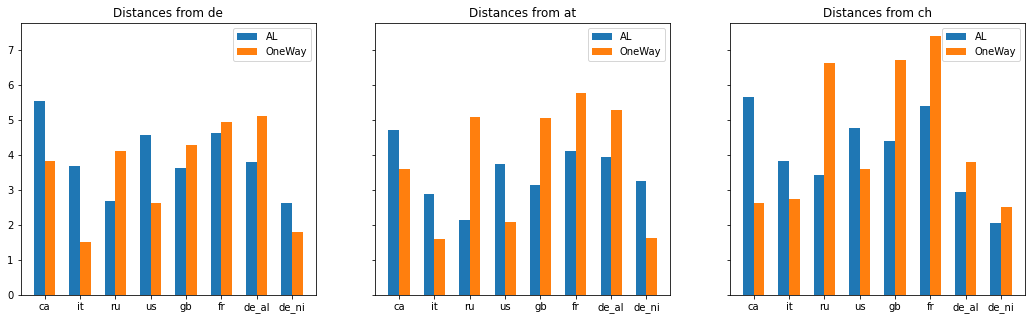

In [37]:
# for each unseen accent, plot the distances to the seen accents for all methods
x = np.arange(len(labels[3:]))
width = .3
# create three axes, one for each seen accent; they share the y-axis
fig, axes = plt.subplots(1, 3, sharey=True)
# increase width of figure
fig.set_size_inches(18, 5)
for idx_seen in range(3):
    axes[idx_seen].bar(x-width/2, emd["AL"][3:, idx_seen], width=width, label="AL")
    axes[idx_seen].bar(x+width/2, emd["OW"][3:, idx_seen], width=width, label="OneWay")
    axes[idx_seen].legend()
    axes[idx_seen].set_title(f"Distances from {labels[idx_seen]}")
    axes[idx_seen].set_xticks(x, labels[3:])
plt.show()

### Conclusions

- There is an inverse correlation between the four worse accents w.r.t. WER and their distances to the seen accents
    - GB is better for OneWay, but is closer to the seen accents for AL
    - US, CA, DE-NI is better for AL, but is closer to the seen accents for OneWay (except DE-NI for CH)
    - AT and CH are closer to DE for AL, but the WER is better for OneWay